In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [296]:
df=pd.read_csv('movies_linear_regression_Final.csv')
df=df.drop(['Unnamed: 0'],axis=1)

In [297]:
holiday_df=pd.read_csv('holidays.csv')
holiday_df=holiday_df.drop(['Unnamed: 0'],axis=1)
df['Holiday_Season']=holiday_df

In [298]:
tropes_df=pd.read_csv('tropes.csv')
tropes_df=tropes_df.drop(['Unnamed: 0'],axis=1)
df['Trope_Count']=tropes_df

In [299]:
domestic_rev=pd.read_csv('domestic_revenue.csv')
domestic_rev=domestic_rev.drop(['Unnamed: 0'],axis=1)
df['Domestic']=domestic_rev

In [300]:
#df=pd.read_csv('movies_lr_Final_fixedbudgets.csv')

In [301]:
#df=df.drop(['Budget'],axis=1)
df.head()

,Title,Revenue,Runtime,Actor_Rankings,PG13,PG,R,G,Approved,Unrated,...,Thriller,War,Crime,Romance,Horror,Western,Biography,Holiday_Season,Trope_Count,Domestic
0,Star Wars: Episode VII - The Force Awakens,2.068456e+09,138.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,9,936662225.0
1,Avengers: Endgame,2.797501e+09,181.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,17,858373000.0
2,Avatar,2.847246e+09,162.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,11,760507625.0
3,Black Panther,1.347598e+09,134.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,9,700426566.0
4,Avengers: Infinity War,NaN,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,11,678815482.0


In [302]:
df['Revenue'].isna().sum()/1699

0.6021188934667452

In [303]:
directors_df=pd.read_csv('directors.csv')

In [304]:
directors_df=directors_df.drop(['Unnamed: 0'],axis=1)

In [305]:
df['Director_Rankings']=directors_df['Director Rankings']

In [306]:
#movies_df.dropna(subset = ["Revenue"], inplace=True)
#movies_df['Revenue']=movies_df['Revenue'].fillna(0) 
#movies_df=movies_df.fillna(0)
movies_df=df.dropna()

In [307]:
movies_df['Revenue']=movies_df['Revenue'].astype('int64')
movies_df['Holiday_Season']=movies_df['Holiday_Season'].astype('int64')
movies_df['Domestic']=movies_df['Domestic'].astype('int64')
#movies_df['Budget']=movies_df['Budget'].astype('int64')

<ipython-input-307-ecbda9214a4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['Revenue']=movies_df['Revenue'].astype('int64')
<ipython-input-307-ecbda9214a4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['Holiday_Season']=movies_df['Holiday_Season'].astype('int64')
<ipython-input-307-ecbda9214a4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [308]:
movies_df.Revenue.describe()

count    6.740000e+02
mean     1.863178e+08
std      3.180992e+08
min      2.680000e+03
25%      9.979213e+06
50%      6.506389e+07
75%      1.962588e+08
max      2.847246e+09
Name: Revenue, dtype: float64

In [309]:
print(movies_df.columns.tolist())

['Title', 'Revenue', 'Runtime', 'Actor_Rankings', 'PG13', 'PG', 'R', 'G', 'Approved', 'Unrated', 'M', 'Passed', 'NA', 'Budget', 'Action', 'Adventure', 'Drama', 'Fantasy', 'Animation', 'Comedy', 'Family', 'Mystery', 'Thriller', 'War', 'Crime', 'Romance', 'Horror', 'Western', 'Biography', 'Holiday_Season', 'Trope_Count', 'Domestic', 'Director_Rankings']


In [310]:
movies_df.Action.value_counts()

1    373
0    301
Name: Action, dtype: int64

In [311]:
print('action: ',movies_df.Action.value_counts()) #633
print('adventure: ',movies_df.Adventure.value_counts()) #486
print('drama: ',movies_df.Drama.value_counts()) #398
print('Fantasy: ',movies_df.Fantasy.value_counts())#260
print('Animation: ',movies_df.Animation.value_counts())
print('Comedy: ',movies_df.Comedy.value_counts()) #355
print('Family: ',movies_df.Family.value_counts())
print('Mystery: ',movies_df.Mystery.value_counts())
print('Thriller: ',movies_df.Thriller.value_counts()) #514
print('War: ',movies_df.War.value_counts())
print('Crime: ',movies_df.Crime.value_counts())
print('Romance: ',movies_df.Romance.value_counts())
print('Horror: ',movies_df.Horror.value_counts())#341
print('Western: ',movies_df.Western.value_counts())
print('Biography: ',movies_df.Biography.value_counts())
#keeping horror, thriller, comedy, drama, adventure, and action

action:  1    373
0    301
Name: Action, dtype: int64
adventure:  0    362
1    312
Name: Adventure, dtype: int64
drama:  0    458
1    216
Name: Drama, dtype: int64
Fantasy:  0    527
1    147
Name: Fantasy, dtype: int64
Animation:  0    585
1     89
Name: Animation, dtype: int64
Comedy:  0    502
1    172
Name: Comedy, dtype: int64
Family:  0    571
1    103
Name: Family, dtype: int64
Mystery:  0    569
1    105
Name: Mystery, dtype: int64
Thriller:  0    395
1    279
Name: Thriller, dtype: int64
War:  0    668
1      6
Name: War, dtype: int64
Crime:  0    647
1     27
Name: Crime, dtype: int64
Romance:  0    605
1     69
Name: Romance, dtype: int64
Horror:  0    538
1    136
Name: Horror, dtype: int64
Western:  0    670
1      4
Name: Western, dtype: int64
Biography:  0    674
Name: Biography, dtype: int64


In [312]:
#keeping action,adventure,drama,&thriller
movies_df=movies_df.drop(['Fantasy','Animation','Family','Mystery',
                'War','Crime','Romance','Western','Biography'],axis=1)

In [313]:
#movies_df=movies_df.drop(['Approved','Unrated','Passed','NA'],axis=1)

In [314]:
'''print('PG13: ',movies_df.PG13.value_counts())
print('PG: ',movies_df.PG.value_counts())
print('R: ',movies_df.R.value_counts())
print('G: ',movies_df.G.value_counts())
print('Approved: ',movies_df.Approved.value_counts()) 
print('Unrated: ',movies_df.Unrated.value_counts())
print('M: ',movies_df.M.value_counts())
print('Passed: ',movies_df.Passed.value_counts())
print('MA: ',movies_df.MA.value_counts())
print('GP: ',movies_df.GP.value_counts())
print('NA: ',movies_df.NA.value_counts())
print('TVY7: ',movies_df.TVY7.value_counts())
print('TV14: ',movies_df.TV14.value_counts())'''

"print('PG13: ',movies_df.PG13.value_counts())\nprint('PG: ',movies_df.PG.value_counts())\nprint('R: ',movies_df.R.value_counts())\nprint('G: ',movies_df.G.value_counts())\nprint('Approved: ',movies_df.Approved.value_counts()) \nprint('Unrated: ',movies_df.Unrated.value_counts())\nprint('M: ',movies_df.M.value_counts())\nprint('Passed: ',movies_df.Passed.value_counts())\nprint('MA: ',movies_df.MA.value_counts())\nprint('GP: ',movies_df.GP.value_counts())\nprint('NA: ',movies_df.NA.value_counts())\nprint('TVY7: ',movies_df.TVY7.value_counts())\nprint('TV14: ',movies_df.TV14.value_counts())"

In [315]:
movies_df.head()

,Title,Revenue,Runtime,Actor_Rankings,PG13,PG,R,G,Approved,Unrated,...,Action,Adventure,Drama,Comedy,Thriller,Horror,Holiday_Season,Trope_Count,Domestic,Director_Rankings
0,Star Wars: Episode VII - The Force Awakens,2068455677,138.0,4,1,0,0,0,0,0,...,1,1,0,0,0,0,1,9,936662225,1
1,Avengers: Endgame,2797501328,181.0,3,1,0,0,0,0,0,...,1,1,1,0,0,0,0,17,858373000,1
2,Avatar,2847246203,162.0,4,1,0,0,0,0,0,...,1,1,0,0,0,0,1,11,760507625,1
3,Black Panther,1347597973,134.0,3,1,0,0,0,0,0,...,1,1,0,0,0,0,0,9,700426566,1
5,Jurassic World,1670516444,124.0,4,1,0,0,0,0,0,...,1,1,0,0,0,0,0,7,652385625,1


In [316]:
movies_df.corr()

,Revenue,Runtime,Actor_Rankings,PG13,PG,R,G,Approved,Unrated,M,...,Action,Adventure,Drama,Comedy,Thriller,Horror,Holiday_Season,Trope_Count,Domestic,Director_Rankings
Revenue,1.000000,0.493819,0.525328,0.350606,-0.020092,-0.226784,-0.028779,-0.044606,-0.134241,-0.000793,...,0.294437,0.374920,-0.230858,-0.075300,-0.200096,-0.198617,0.091820,0.360536,0.954698,0.522549
Runtime,0.493819,1.000000,0.352654,0.255540,-0.182544,-0.029647,-0.069650,-0.011366,-0.084047,0.010690,...,0.212912,0.120835,0.068561,-0.281503,-0.043088,-0.206423,0.026095,0.357314,0.468823,0.364643
Actor_Rankings,0.525328,0.352654,1.000000,0.304353,-0.036015,-0.118803,-0.064277,0.015234,-0.186351,-0.047373,...,0.157811,0.180625,-0.117066,-0.030742,-0.040548,-0.248351,-0.024091,0.248299,0.546488,0.404836
PG13,0.350606,0.255540,0.304353,1.000000,-0.377949,-0.517770,-0.132508,-0.061809,-0.195533,-0.061809,...,0.247496,0.135757,-0.125695,-0.154293,0.056393,-0.174830,-0.048911,0.183735,0.334940,0.309534
PG,-0.020092,-0.182544,-0.036015,-0.377949,1.000000,-0.305813,-0.054438,-0.036506,-0.115489,-0.036506,...,-0.031446,0.300925,-0.143377,0.349007,-0.217708,-0.151408,0.036139,-0.159198,0.022201,0.022445
R,-0.226784,-0.029647,-0.118803,-0.517770,-0.305813,1.000000,-0.107217,-0.050012,-0.158213,-0.050012,...,-0.098983,-0.313884,0.106120,-0.155055,0.149406,0.306720,0.007885,0.072484,-0.226716,-0.159189
G,-0.028779,-0.069650,-0.064277,-0.132508,-0.054438,-0.107217,1.000000,-0.012799,-0.040490,-0.012799,...,-0.110353,0.104603,-0.015156,0.050798,-0.101847,-0.060354,0.021082,-0.085756,-0.033240,-0.052391
Approved,-0.044606,-0.011366,0.015234,-0.061809,-0.036506,-0.050012,-0.012799,1.000000,-0.018887,-0.005970,...,0.030554,-0.071732,0.112512,-0.045228,0.052718,-0.038848,0.050052,0.020414,-0.046445,-0.059898
Unrated,-0.134241,-0.084047,-0.186351,-0.195533,-0.115489,-0.158213,-0.040490,-0.018887,1.000000,-0.018887,...,-0.116835,-0.123723,0.162956,0.063484,-0.022593,-0.010701,0.001645,-0.099429,-0.146145,-0.176204
M,-0.000793,0.010690,-0.047373,-0.061809,-0.036506,-0.050012,-0.012799,-0.005970,-0.018887,1.000000,...,-0.008302,-0.032992,0.029725,-0.045228,-0.025719,0.009284,-0.022341,-0.050508,-0.045923,-0.059898


In [317]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 1649
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              674 non-null    object 
 1   Revenue            674 non-null    int64  
 2   Runtime            674 non-null    float64
 3   Actor_Rankings     674 non-null    int64  
 4   PG13               674 non-null    int64  
 5   PG                 674 non-null    int64  
 6   R                  674 non-null    int64  
 7   G                  674 non-null    int64  
 8   Approved           674 non-null    int64  
 9   Unrated            674 non-null    int64  
 10  M                  674 non-null    int64  
 11  Passed             674 non-null    int64  
 12  NA                 674 non-null    int64  
 13  Budget             674 non-null    float64
 14  Action             674 non-null    int64  
 15  Adventure          674 non-null    int64  
 16  Drama              674 no

In [318]:
clean_df=movies_df.drop(['Title'],axis=1)

In [328]:
clean_df2=clean_df.drop(['Horror','M','R','G','PG','Drama','Comedy','Thriller','Approved','Unrated','Passed','NA','Budget'],axis=1)

In [329]:
clean_df2.head()

,Revenue,Runtime,Actor_Rankings,PG13,Action,Adventure,Holiday_Season,Trope_Count,Domestic,Director_Rankings
0,2068455677,138.0,4,1,1,1,1,9,936662225,1
1,2797501328,181.0,3,1,1,1,0,17,858373000,1
2,2847246203,162.0,4,1,1,1,1,11,760507625,1
3,1347597973,134.0,3,1,1,1,0,9,700426566,1
5,1670516444,124.0,4,1,1,1,0,7,652385625,1


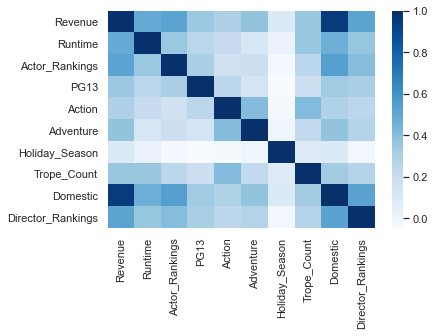

In [343]:
sns.heatmap(clean_df2.corr(), cmap='Blues', annot=False);

In [344]:
smaller=clean_df.drop(['Horror','M','R','G','PG','Drama','Comedy','Thriller','Approved','Action',
                       'Domestic','Unrated','Passed','NA','Budget',
                      'Holiday_Season'],axis=1)

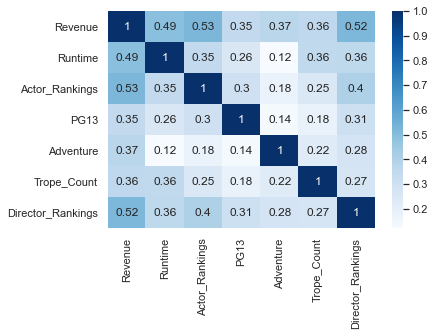

In [345]:
sns.heatmap(smaller.corr(), cmap='Blues', annot=True);

In [346]:
lr=LinearRegression()

In [347]:
X=clean_df[['Runtime','Director_Rankings','Actor_Rankings','PG13','Holiday_Season','Adventure','Trope_Count']]
y=clean_df['Domestic']

In [348]:
fit=lr.fit(X, y)

In [349]:
lr.score(X,y)

0.5201603616663861

In [350]:
model=sm.OLS(y,sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Domestic   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 14 May 2021   Prob (F-statistic):          7.74e-102
Time:                        02:07:32   Log-Likelihood:                -13261.
No. Observations:                 674   AIC:                         2.654e+04
Df Residuals:                     666   BIC:                         2.657e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.889e+08   2.08e+07     -9.070      0.000    -2.3e+08   -1.48e+08
Runtime            1.391e+06   2.06e+05      6.752      0.000    9.87e+05     1.8e+06
Director_Rankings  6.003e+07   8.01e+06      7.492      0.000    4.43e+07    7.58e+07
Actor_Rankings     3.022e+07   3.06e+06      9.865      0.000    2.42e+07    3.62e+07
PG13               2.095e+07   7.31e+06      2.864      0.004    6.59e+06    3.53e+07
Holiday_Season     4.529e+07   1.24e+07      3.654      0.000     2.1e+07    6.96e+07
Adventure           5.05e+07   6.97e+06      7.248      0.000    3.68e+07    6.42e+07
Trope_Count        2.378e+06   1.49e+06      1.599      0.110   -5.42e+05     5.3e+06
==============================================================================
Omnibus:                      354.085   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3437.244
Skew:                           2.147   Prob(JB):                         0.00
Kurtosis:                      13.196   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [351]:
clean_df.describe()

,Revenue,Runtime,Actor_Rankings,PG13,PG,R,G,Approved,Unrated,M,...,Action,Adventure,Drama,Comedy,Thriller,Horror,Holiday_Season,Trope_Count,Domestic,Director_Rankings
count,6.740000e+02,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,6.740000e+02,674.000000
mean,1.863178e+08,108.455490,1.256677,0.390208,0.182493,0.295252,0.026706,0.005935,0.056380,0.005935,...,0.553412,0.462908,0.320475,0.255193,0.413947,0.201780,0.077151,7.102374,7.444954e+07,0.375371
std,3.180992e+08,18.405663,1.235071,0.488159,0.386537,0.456495,0.161343,0.076865,0.230825,0.076865,...,0.497508,0.498993,0.467006,0.436293,0.492905,0.401627,0.267030,2.453107,1.225170e+08,0.484578
min,2.680000e+03,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.699000e+03,0.000000
25%,9.979213e+06,94.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.522017e+06,0.000000
50%,6.506389e+07,106.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.994591e+07,0.000000
75%,1.962588e+08,119.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.000000,7.924044e+07,1.000000
max,2.847246e+09,181.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,9.366622e+08,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


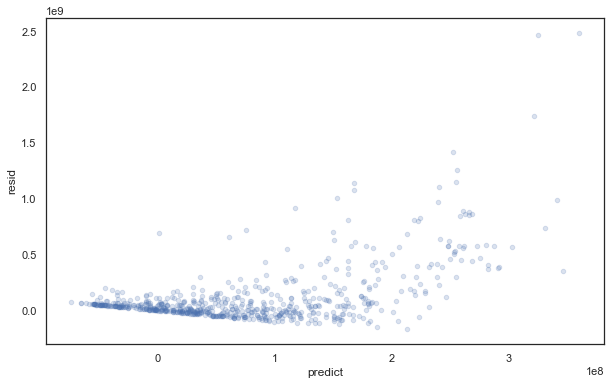

In [352]:
clean_df['predict']=fit.predict(X)
clean_df['resid']=clean_df.Revenue-clean_df.predict
with sns.axes_style('white'):
    plot=clean_df.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

In [353]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [354]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [355]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [356]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_val,y_val)

0.6115332371693856

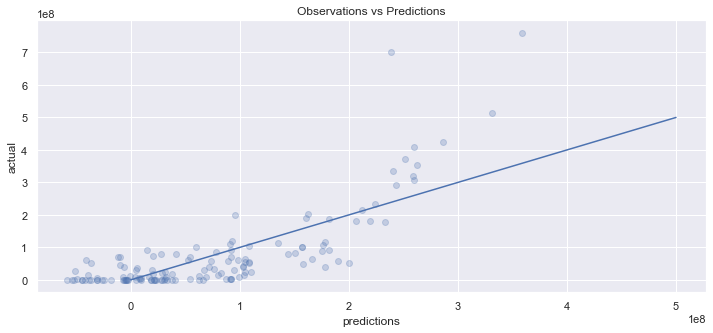

In [357]:
plt.figure(figsize=(12,5))

p_y = lm.predict(X_val)
plt.scatter(p_y, y_val, alpha=0.25)
plt.plot([0, 500000000], [0, 500000000])
plt.ylabel('actual')
plt.xlabel('predictions')
plt.title("Observations vs Predictions");

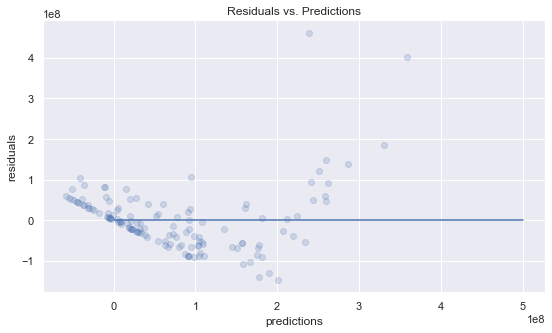

In [358]:
plt.figure(figsize=(9,5))

lm_residuals = y_val - p_y
plt.scatter(p_y, lm_residuals, alpha=.2)
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.plot([0,500000000], [0, 0])
plt.title("Residuals vs. Predictions");


In [359]:
#creating interaction features
clean_df2['Director_RT']=movies_df['Runtime']*movies_df['Director_Rankings']
clean_df2['Actors_RT']=movies_df['Runtime']*movies_df['Actor_Rankings']
clean_df2['Action_RT']=movies_df['Runtime']*movies_df['Action']
clean_df2['PG13_RT']=movies_df['Runtime']*movies_df['PG13']
clean_df2['Holiday_RT']=movies_df['Runtime']*movies_df['Holiday_Season']
clean_df2['Adventure_RT']=movies_df['Runtime']*movies_df['Adventure']
clean_df2['Trope_RT']=movies_df['Runtime']*movies_df['Trope_Count']

In [360]:
clean_df2.head()

,Revenue,Runtime,Actor_Rankings,PG13,Action,Adventure,Holiday_Season,Trope_Count,Domestic,Director_Rankings,Director_RT,Actors_RT,Action_RT,PG13_RT,Holiday_RT,Adventure_RT,Trope_RT
0,2068455677,138.0,4,1,1,1,1,9,936662225,1,138.0,552.0,138.0,138.0,138.0,138.0,1242.0
1,2797501328,181.0,3,1,1,1,0,17,858373000,1,181.0,543.0,181.0,181.0,0.0,181.0,3077.0
2,2847246203,162.0,4,1,1,1,1,11,760507625,1,162.0,648.0,162.0,162.0,162.0,162.0,1782.0
3,1347597973,134.0,3,1,1,1,0,9,700426566,1,134.0,402.0,134.0,134.0,0.0,134.0,1206.0
5,1670516444,124.0,4,1,1,1,0,7,652385625,1,124.0,496.0,124.0,124.0,0.0,124.0,868.0


In [372]:
interaction_df=clean_df2.drop(['Actor_Rankings','PG13','Action','Adventure','Director_Rankings'],axis=1)

<AxesSubplot:>

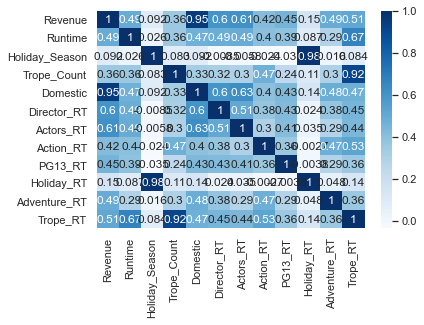

In [373]:
sns.heatmap(interaction_df.corr(), cmap='Blues', annot=True)

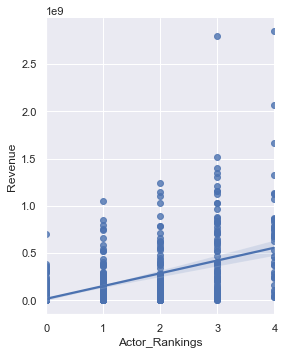

In [374]:
sns.pairplot(clean_df, x_vars=['Actor_Rankings'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

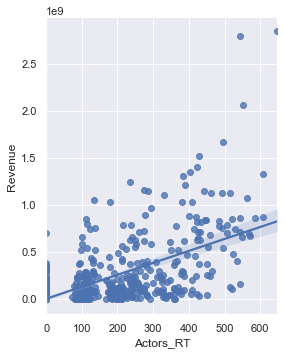

In [375]:
sns.pairplot(interaction_df, x_vars=['Actors_RT'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

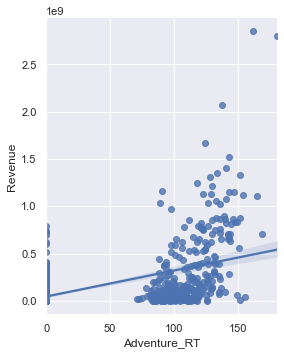

In [376]:
sns.pairplot(interaction_df, x_vars=['Adventure_RT'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

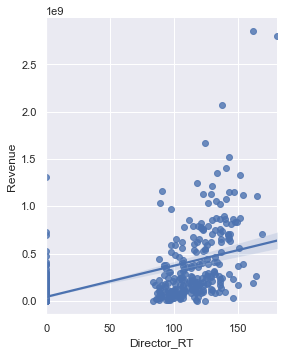

In [377]:
sns.pairplot(interaction_df, x_vars=['Director_RT'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

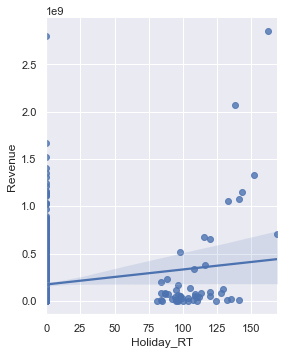

In [378]:
sns.pairplot(interaction_df, x_vars=['Holiday_RT'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

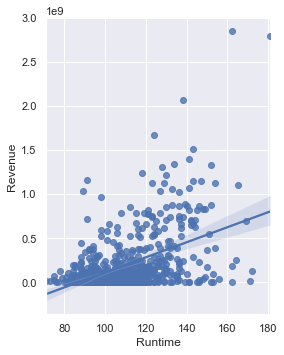

In [379]:
sns.pairplot(interaction_df, x_vars=['Runtime'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

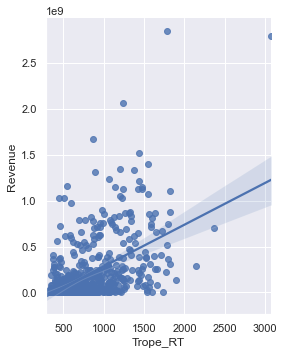

In [380]:
sns.pairplot(interaction_df, x_vars=['Trope_RT'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

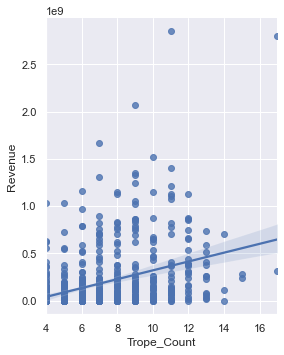

In [386]:
sns.pairplot(clean_df, x_vars=['Trope_Count'], y_vars=['Revenue'],
             height=5, aspect=.8, kind="reg");

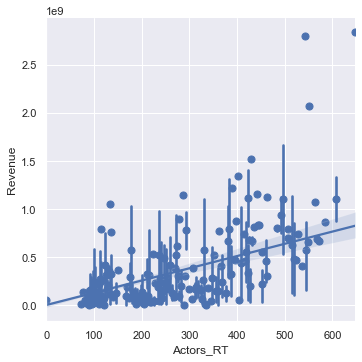

In [384]:
sns.lmplot(x='Actors_RT', y="Revenue", data=interaction_df, x_estimator=np.mean);

In [382]:
lr2=LinearRegression()
X2=interaction_df[['Runtime','Director_RT','Actors_RT','PG13_RT','Holiday_RT','Adventure_RT','Trope_Count']]
y2=interaction_df['Domestic']

In [242]:
fit2=lr2.fit(X2, y2)
lr2.score(X2,y2)

0.5769572262713681

In [243]:
model2=sm.OLS(y2,sm.add_constant(X2))
results2=model2.fit()
results2.summary()
#coefficients decreased -- good 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Domestic   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     129.8
Date:                Fri, 14 May 2021   Prob (F-statistic):          6.05e-120
Time:                        00:49:33   Log-Likelihood:                -13218.
No. Observations:                 674   AIC:                         2.645e+04
Df Residuals:                     666   BIC:                         2.649e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.088e+07   2.11e+07     -3.358      0.001   -1.12e+08   -2.94e+07
Runtime       3.211e+05    2.1e+05      1.527      0.127   -9.18e+04    7.34e+05
Director_RT   5.626e+05   6.87e+04      8.192      0.000    4.28e+05    6.97e+05
Actors_RT     2.891e+05   2.54e+04     11.403      0.000    2.39e+05    3.39e+05
PG13_RT       1.635e+05   6.32e+04      2.589      0.010    3.95e+04    2.88e+05
Holiday_RT    4.396e+05   1.04e+05      4.227      0.000    2.35e+05    6.44e+05
Adventure_RT      5e+05   6.05e+04      8.266      0.000    3.81e+05    6.19e+05
Trope_Count   1.037e+06    1.4e+06      0.738      0.460   -1.72e+06    3.79e+06
==============================================================================
Omnibus:                      331.267   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.157
Skew:                           1.979   Prob(JB):                         0.00
Kurtosis:                      12.756   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
X2, X_test2, y2, y_test2 = train_test_split(X2, y2, test_size=.2, random_state=10)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=.25, random_state=3)

In [245]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6)

In [246]:
reg = RandomForestRegressor(n_estimators=1700)
reg.fit(X_train,y_train)
reg.score(X_val,y_val)

0.7671986514962641

In [247]:
feat_importance_df = pd.DataFrame(reg.feature_importances_,index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
feat_importance_df

,feature importance
Runtime,0.303529
Actor_Rankings,0.253392
Director_Rankings,0.186104
Trope_Count,0.099634
Holiday_Season,0.072245
Adventure,0.065633
PG13,0.019463


In [248]:
df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in reg.estimators_])
df_feature_all.head()

,0,1,2,3,4,5,6
0,0.332115,0.358616,0.138436,0.013001,0.022317,0.071611,0.063904
1,0.289925,0.216950,0.359064,0.021467,0.030286,0.015309,0.066998
2,0.335533,0.064580,0.332614,0.004077,0.052989,0.121706,0.088500
3,0.206329,0.276150,0.188057,0.012264,0.091609,0.050195,0.175397
4,0.278085,0.332384,0.212722,0.003007,0.039437,0.041504,0.092861


In [249]:
df_feature_long = pd.melt(df_feature_all,var_name='feature name', value_name='values')

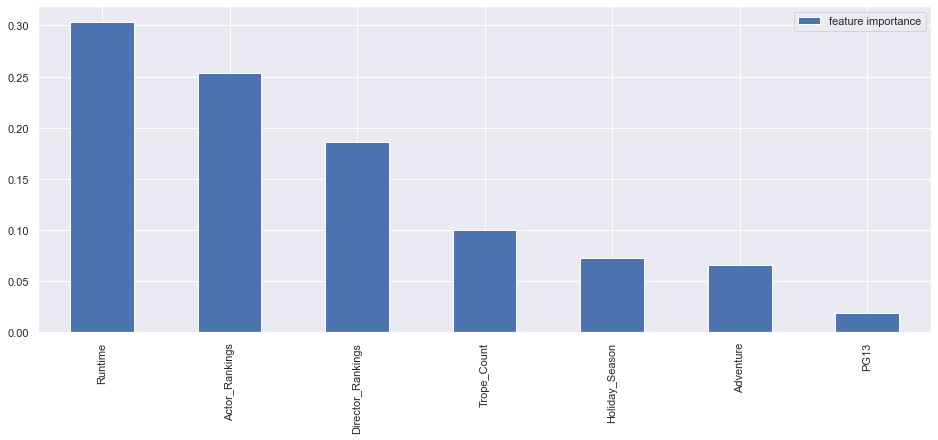

In [250]:
feat_importance_df.plot(kind='bar');


In [251]:
lst = list(zip(X_train.columns,reg.feature_importances_))

In [387]:
lst = sorted(lst, key = lambda x: x[1], reverse=True)
feature_importance = pd.DataFrame(lst, columns=['Features','Feature Importance'])

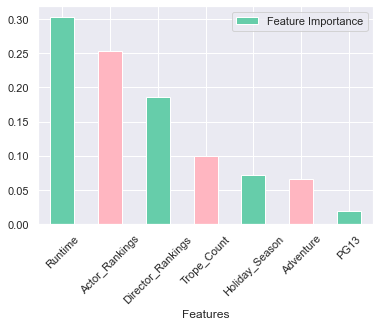

In [388]:
feature_importance.plot(x='Features',y='Feature Importance',kind='bar',color=['mediumaquamarine','lightpink'])
plt.xticks(rotation=45);


## Now trying feature importance with interaction terms instead of binary terms:

In [254]:
reg2 = RandomForestRegressor(n_estimators=1700)
reg2.fit(X_train2,y_train2)

RandomForestRegressor(n_estimators=1700)

In [255]:
reg2.score(X_val2,y_val2)

0.7516560170946607

In [256]:
feat_importance_df2 = pd.DataFrame(reg2.feature_importances_,index=X_train2.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
feat_importance_df2

,feature importance
Actors_RT,0.383139
Director_RT,0.202289
Adventure_RT,0.178051
Holiday_RT,0.078167
PG13_RT,0.063960
Trope_Count,0.050350
Runtime,0.044044


In [257]:
df_feature_all2 = pd.DataFrame([tree.feature_importances_ for tree in reg2.estimators_])
df_feature_all2.head()

,0,1,2,3,4,5,6
0,0.054264,0.072351,0.353863,0.031107,0.114749,0.306240,0.067426
1,0.010541,0.550319,0.183992,0.031873,0.060760,0.048583,0.113932
2,0.055235,0.311772,0.279806,0.076669,0.112387,0.137968,0.026163
3,0.075095,0.130316,0.441334,0.026990,0.116907,0.171900,0.037458
4,0.049731,0.163470,0.192370,0.003527,0.044768,0.523645,0.022487


In [258]:
lst2 = list(zip(X_train2.columns,reg2.feature_importances_))

In [259]:
lst2 = sorted(lst2, key = lambda x: x[1], reverse=True)
feature_importance = pd.DataFrame(lst2, columns=['Features','Feature Importance'])

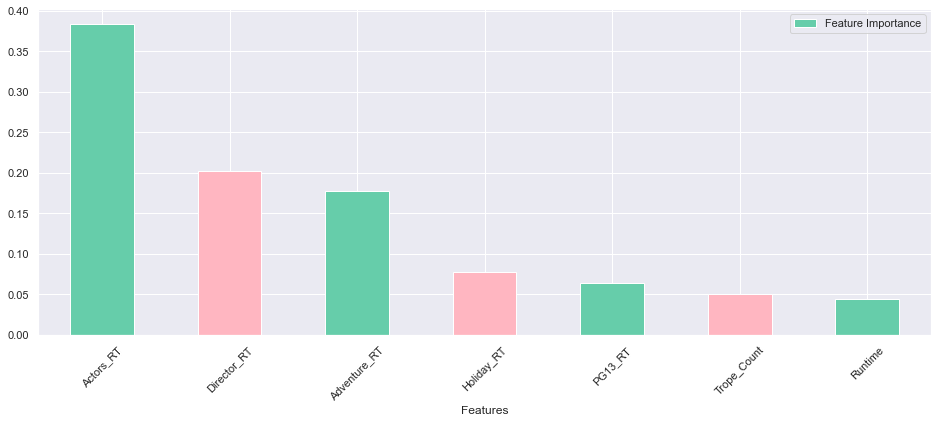

In [260]:
feature_importance.plot(x='Features',y='Feature Importance',kind='bar', color=['mediumaquamarine','lightpink'])
labels=['Actors','Directors','PG13','Holiday Season','Runtime']
plt.xticks(rotation=45);


In [262]:
#RMSE
p=lm.predict(X_val2)
actual=y_test
np.sqrt(np.mean((actual - p)**2)) #this is high

14768539857.9782

In [263]:
'''scaler = StandardScaler()

X_train2_scaled = scaler.fit_transform(X_train2)
X_val2_scaled = scaler.transform(X_val2)
X_test2_scaled = scaler.transform(X_test2)'''

In [266]:
'''lm_ridge=Ridge(alpha=1)
lm_lasso=Lasso()'''

In [268]:
'''lm.fit(X_train2, y_train2) #simple LR
lm.score(X_val2,y_val2)'''

0.6907840923632587

In [269]:
'''lm_ridge.fit(X_train2_scaled, y_train2) #Ridge
lm_ridge.score(X_val2_scaled,y_val2)'''

0.6907447394507025

In [ ]:
'''lm_lasso.fit(X_train2_scaled,y_train2)
lm_lasso.score(X_val2_scaled,y_val2)'''

CV for due diligence:

In [277]:
y = interaction_df['Domestic']
X = interaction_df[['Runtime','Director_RT','Actors_RT','PG13_RT','Holiday_RT','Adventure_RT','Trope_Count']]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 


In [278]:
X, y = np.array(X), np.array(y)
scaler=StandardScaler()
scaledX=scaler.fit_transform(X)
scaledXtest=scaler.transform(X_test)

In [284]:
lm=LinearRegression()
lm_ridge=Ridge(alpha=1)
kf=KFold(n_splits=5,shuffle=True,random_state=71)
lm_lasso=Lasso()

In [285]:
cross_val_score(lm,X,y,cv=kf,scoring='r2')

array([0.68905014, 0.39476909, 0.5179539 , 0.52666793, 0.66936337])

In [286]:
np.mean(cross_val_score(lm,X,y,cv=kf,scoring='r2'))

0.5595608848027405

In [287]:
cross_val_score(lm_ridge,X,y,cv=kf,scoring='r2')

array([0.68905259, 0.39476686, 0.51795756, 0.52666686, 0.66936462])

In [283]:
np.mean(cross_val_score(lm_ridge, X, y, cv=kf, scoring='r2'))

0.5595616965020044

In [288]:
cross_val_score(lm_lasso,X,y,cv=kf,scoring='r2')

array([0.68905014, 0.39476909, 0.5179539 , 0.52666793, 0.66936337])

In [289]:
np.mean(cross_val_score(lm_lasso,X,y,cv=kf,scoring='r2'))

0.5595608848397026